In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,f1_score,auc,confusion_matrix,precision_recall_curve,roc_curve
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

C:\Users\m1013523\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
train = pd.read_csv("train.csv",parse_dates=['origination_date','first_payment_date'],dayfirst=True)
test = pd.read_csv("test.csv",parse_dates=['origination_date','first_payment_date'],dayfirst=True)

In [3]:
print ("Training Data Shape:",train.shape)
print ("Testing Data Shape:",test.shape)

Training Data Shape: (116058, 29)
Testing Data Shape: (35866, 28)


In [4]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [5]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,2012-02-01,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,2012-02-01,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,2012-01-01,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,2012-02-01,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,2012-02-01,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null datetime64[ns]
first_payment_date          116058 non-null datetime64[ns]
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2  

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null datetime64[ns]
first_payment_date          35866 non-null object
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null 

In [8]:
train.dtypes.value_counts()

int64             17
float64            7
object             3
datetime64[ns]     2
dtype: int64

In [9]:
test.dtypes.value_counts()

int64             22
object             4
float64            1
datetime64[ns]     1
dtype: int64

In [10]:
Submission = test[['loan_id']]
train.drop('loan_id',axis=1,inplace=True)
test.drop('loan_id',axis=1,inplace=True)

### Exploratory Data Analysis

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

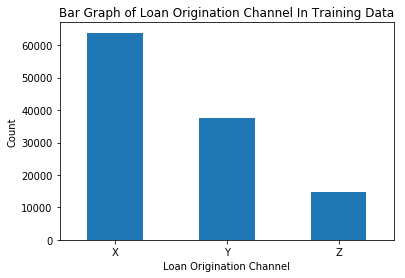

In [11]:
train['source'].value_counts(dropna=False).plot(kind='bar')
plt.title("Bar Graph of Loan Origination Channel In Training Data")
plt.xlabel("Loan Origination Channel")
plt.ylabel("Count")
plt.xticks(rotation='horizontal')
# Most of the Loans are disbursed through channel X followed by Y and then z. There is significant difference between them.
# No Missing values in this column in the training set.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

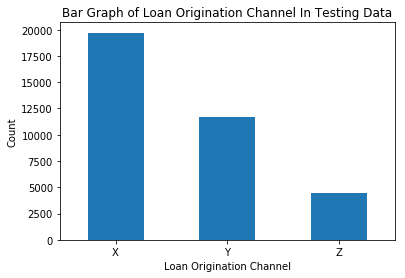

In [12]:
test['source'].value_counts(dropna=False).plot(kind='bar')
plt.title("Bar Graph of Loan Origination Channel In Testing Data")
plt.xlabel("Loan Origination Channel")
plt.ylabel("Count")
plt.xticks(rotation='horizontal')
# No Missing values in this column in the training set.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

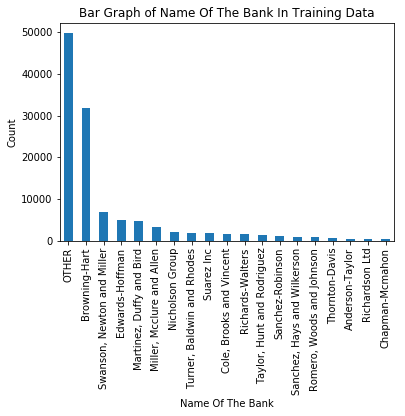

In [13]:
train['financial_institution'].value_counts(dropna=False).plot(kind='bar')
plt.title("Bar Graph of Name Of The Bank In Training Data")
plt.xlabel("Name Of The Bank")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
# Majority of the loans are disbursed by two banks, namely Browning-Hart and OTHER (This is not a bank).
# No Missing values in this column in the training set.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

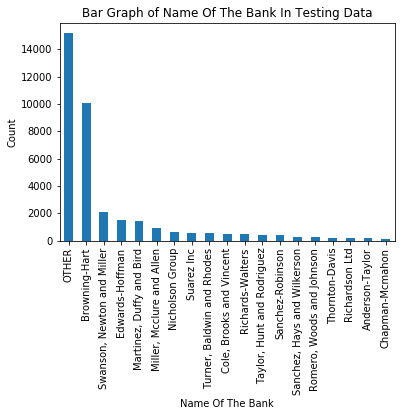

In [14]:
test['financial_institution'].value_counts(dropna=False).plot(kind='bar')
plt.title("Bar Graph of Name Of The Bank In Testing Data")
plt.xlabel("Name Of The Bank")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
# Majority of the loans are disbursed by two banks, namely Browning-Hart and OTHER (This is not a bank).
# No Missing values in this column in the training set.

Text(0,0.5,'Frequency')

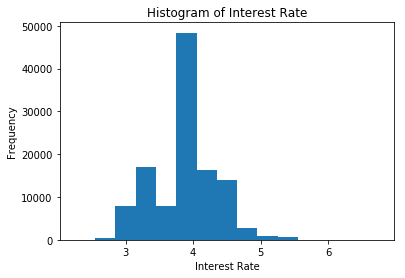

In [15]:
plt.hist(train['interest_rate'],bins=15)
plt.title("Histogram of Interest Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
# Majority of the interest rates are around 4% level.

Text(0.5,1,'Boxplot of Interest Rates')

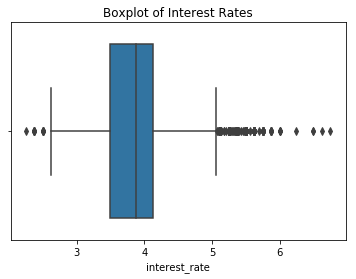

In [16]:
sns.boxplot(train['interest_rate'])
plt.title("Boxplot of Interest Rates")
# We can see some extreme values such as more than 6% 

Text(0,0.5,'Frequency')

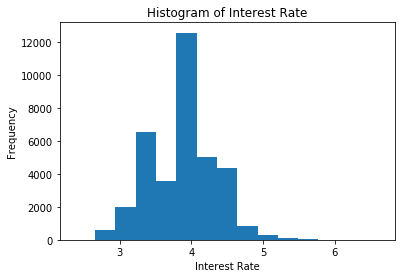

In [17]:
plt.hist(test['interest_rate'],bins=15)
plt.title("Histogram of Interest Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
# Majority of the interest rates are around 4% level.

Text(0,0.5,'Frequency')

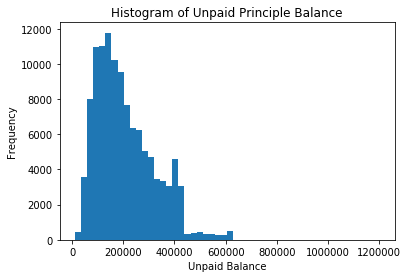

In [18]:
plt.hist(train['unpaid_principal_bal'],bins=50)
plt.title("Histogram of Unpaid Principle Balance")
plt.xlabel("Unpaid Balance")
plt.ylabel("Frequency")
# Looks like a positively skewed distribution.

Text(0.5,1,'Boxplot of Unpaid Balance')

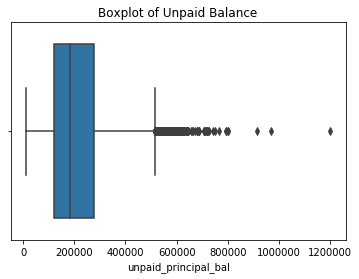

In [19]:
sns.boxplot(train['unpaid_principal_bal'])
plt.title("Boxplot of Unpaid Balance")
# We can see some extreme values here as well 

In [20]:
train.drop(train[train['unpaid_principal_bal'] > 900000].index,axis=0,inplace=True)

Text(0.5,1,'Boxplot of Unpaid Balance')

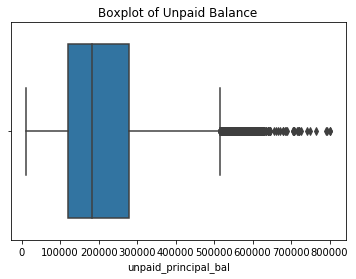

In [21]:
sns.boxplot(train['unpaid_principal_bal'])
plt.title("Boxplot of Unpaid Balance")
# After dropping the extreme values, this looks similar to the test data

Text(0,0.5,'Frequency')

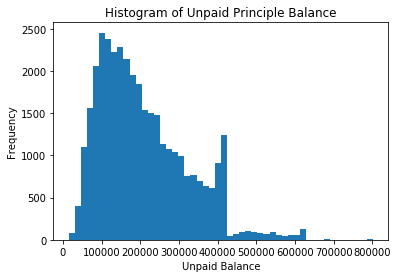

In [22]:
plt.hist(test['unpaid_principal_bal'],bins=50)
plt.title("Histogram of Unpaid Principle Balance")
plt.xlabel("Unpaid Balance")
plt.ylabel("Frequency")
# Looks like a positively skewed distribution.

Text(0.5,1,'Boxplot of Unpaid Balance')

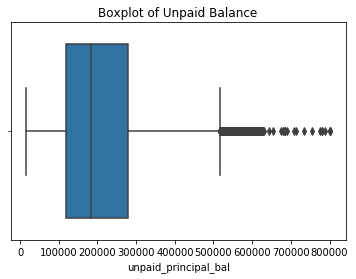

In [23]:
sns.boxplot(test['unpaid_principal_bal'])
plt.title("Boxplot of Unpaid Balance")
# We can see some extreme values here as well 

In [24]:
# Calculating the value of the asset based on LTV ratio and unpaid principal balance
train['value_of_asset'] = round((train['unpaid_principal_bal']/train['loan_to_value'])*100,0)
test['value_of_asset'] = round((test['unpaid_principal_bal']/test['loan_to_value'])*100,0)

Text(0,0.5,'Frequency')

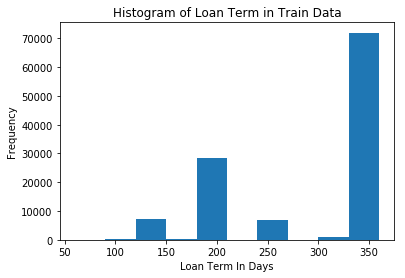

In [25]:
plt.hist(train['loan_term'],bins=10)
plt.title("Histogram of Loan Term in Train Data")
plt.xlabel("Loan Term In Days")
plt.ylabel("Frequency")
# Most of the Loan Terms are for 360 days followed by around 200 days.

In [26]:
train['loan_term'].value_counts(dropna=False).sort_values(ascending=False).head()
# Most of the loan terms are of 360 days followed by 180 days, i.e. a year or 6 months.

360    71810
180    28583
120     7061
240     6749
300      912
Name: loan_term, dtype: int64

Text(0,0.5,'Frequency')

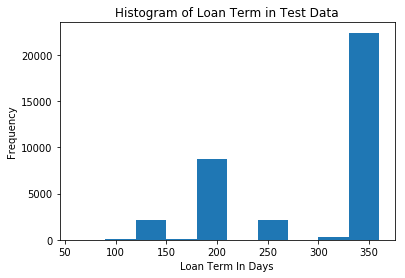

In [27]:
plt.hist(test['loan_term'],bins=10)
plt.title("Histogram of Loan Term in Test Data")
plt.xlabel("Loan Term In Days")
plt.ylabel("Frequency")
# Most of the Loan Terms are for 360 days followed by around 200 days.

In [28]:
train['origination_year'] = train['origination_date'].dt.year
train['origination_month'] = train['origination_date'].dt.month
train['origination_day'] = train['origination_date'].dt.day
train['origination_quarter'] = train['origination_date'].dt.quarter

In [29]:
# from the columns generated above, origination_year, origination_day and origination_quarter all have single values. It makes 
# to delete them as they are basically redundant and keep only origination_month column
train.drop(['origination_year','origination_day','origination_quarter','origination_date'],axis=1,inplace=True)

In [30]:
test['origination_year'] = test['origination_date'].dt.year
test['origination_month'] = test['origination_date'].dt.month
test['origination_day'] = test['origination_date'].dt.day
test['origination_quarter'] = test['origination_date'].dt.quarter

In [31]:
# from the columns generated above, origination_year, origination_day and origination_quarter all have single values. It makes 
# to delete them as they are basically redundant and keep only origination_month column
test.drop(['origination_year','origination_day','origination_quarter','origination_date'],axis=1,inplace=True)

In [32]:
train['first_payment_day'] = train['first_payment_date'].dt.day
train['first_payment_month'] = train['first_payment_date'].dt.month
train['first_payment_quarter'] = train['first_payment_date'].dt.quarter
train['first_payment_year'] = train['first_payment_date'].dt.year

In [33]:
# from the columns generated above, first_payment_year, first_payment_day all have single values. It makes 
# to delete them as they are basically redundant and keep only origination_month column
train.drop(['first_payment_year','first_payment_day','first_payment_date'],axis=1,inplace=True)

In [34]:
# Since the date couldn't be read properly in the testing dataset, it had to be converted to string to extract required information.
test['first_payment_month'] = test['first_payment_date'].str[:3]
test['first_payment_day'] = test['first_payment_date'].str[-2:]

In [35]:
# from the columns generated above, first_payment_day has single value. It makes  to delete them as they are basically redundant
# and keep only origination_month column
test.drop(['first_payment_day','first_payment_date'],axis=1,inplace=True)

In [36]:
test['first_payment_month'].replace({"Feb":2,"Mar":3,"Apr":4,"May":5},inplace=True)

In [37]:
# Generating first_payment_quarter column using the function below.
def f(x):
    if ((x['first_payment_month']==1)|(x['first_payment_month']==2)|(x['first_payment_month']==3)):
        return 1
    elif ((x['first_payment_month']==4)|(x['first_payment_month']==5)|(x['first_payment_month']==6)):
        return 2
test['first_payment_quarter'] = test.apply(f,axis=1)

In [38]:
train['loan_to_value'].describe()
# The maximum value of Loan to Value ratio is 97% and the minimum is 6%, the average value is 67%.

count    116055.000000
mean         67.432192
std          17.291803
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

Text(0.5,1,'Box Plot of Loan to Value ratio')

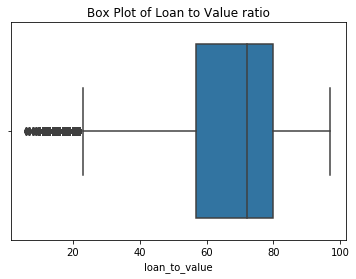

In [39]:
sns.boxplot(train['loan_to_value'])
plt.title("Box Plot of Loan to Value ratio")
# There seems to be a lot of values below 20% LTV ratio.

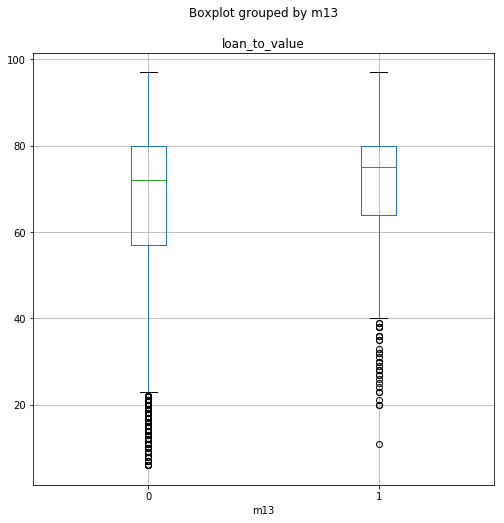

In [40]:
train.boxplot(column='loan_to_value',by='m13',figsize=(8,8))
# The box plot of LTV for m13==1 is much narrower as compared to m13==0

(array([0, 1]), <a list of 2 Text xticklabel objects>)

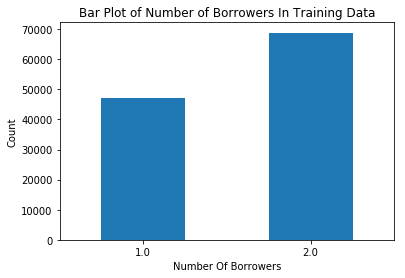

In [41]:
train['number_of_borrowers'].value_counts(dropna=False).sort_values().plot(kind='bar')
plt.xlabel("Number Of Borrowers")
plt.ylabel("Count")
plt.title("Bar Plot of Number of Borrowers In Training Data")
plt.xticks(rotation='horizontal')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

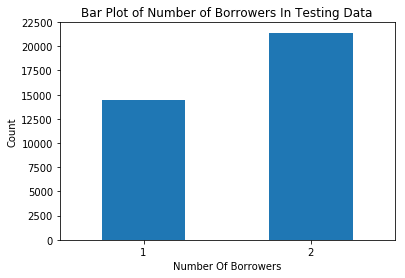

In [42]:
test['number_of_borrowers'].value_counts(dropna=False).sort_values().plot(kind='bar')
plt.xlabel("Number Of Borrowers")
plt.ylabel("Count")
plt.title("Bar Plot of Number of Borrowers In Testing Data")
plt.xticks(rotation='horizontal')

In [43]:
train['debt_to_income_ratio'].describe()
# Maximum value is 64% with average value of 30%.

count    116055.000000
mean         30.742140
std           9.730765
min           1.000000
25%          23.000000
50%          31.000000
75%          39.000000
max          64.000000
Name: debt_to_income_ratio, dtype: float64

Text(0.5,1,'Box Plot of Debt to Income ratio')

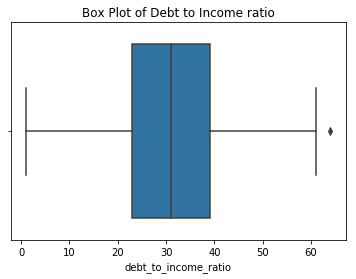

In [44]:
sns.boxplot(train['debt_to_income_ratio'])
plt.title("Box Plot of Debt to Income ratio")
# Not many outliers here

Text(0,0.5,'Frequency')

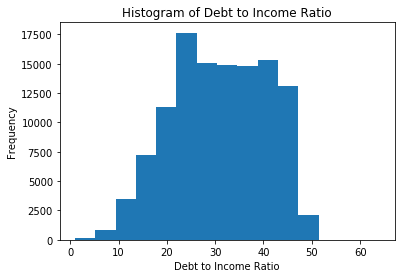

In [45]:
plt.hist(train['debt_to_income_ratio'],bins=15)
plt.title("Histogram of Debt to Income Ratio")
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Frequency")

In [46]:
train['borrower_credit_score'].describe()
# Average credit score is 769 with maximum value of 840 and minimum of 0 (This needs to be explored further)

count    116055.000000
mean        769.926345
std          42.211145
min           0.000000
25%         751.000000
50%         782.000000
75%         800.000000
max         840.000000
Name: borrower_credit_score, dtype: float64

In [47]:
train[train['borrower_credit_score'] == 0]

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,value_of_asset,origination_month,first_payment_month,first_payment_quarter
683,X,OTHER,3.750,82000,360,70,1.0,30.0,0.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,117143.0,1,3,1
4417,X,OTHER,3.250,301000,180,70,1.0,14.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,430000.0,1,3,1
9571,X,Browning-Hart,3.875,171000,360,80,1.0,29.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,213750.0,1,3,1
11175,X,OTHER,4.625,210000,360,70,1.0,39.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,300000.0,3,5,2
13977,X,OTHER,4.375,180000,360,67,1.0,32.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,268657.0,1,3,1
16618,X,Browning-Hart,2.875,169000,180,80,1.0,6.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,211250.0,1,3,1
16665,X,OTHER,4.499,95000,360,70,1.0,20.0,0.0,C86,0.0,0.0,0.0,0,1,2,0,0,0,0,0,0,0,0,0,0,135714.0,2,4,2
21881,X,Browning-Hart,3.625,206000,360,80,1.0,11.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,257500.0,1,3,1
23969,X,Browning-Hart,4.750,94000,360,80,2.0,15.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,117500.0,2,4,2
25323,X,OTHER,4.250,149000,360,70,1.0,11.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,212857.0,1,3,1


In [48]:
test['borrower_credit_score'].describe()

count    35866.000000
mean       769.926504
std         41.779664
min          0.000000
25%        751.000000
50%        782.000000
75%        799.000000
max        839.000000
Name: borrower_credit_score, dtype: float64

In [49]:
test[test['borrower_credit_score'] == 0]

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,value_of_asset,origination_month,first_payment_month,first_payment_quarter
147,X,OTHER,4.250,280000,360,70,1,24,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,400000.0,2,4,2
3165,X,Nicholson Group,4.625,92000,360,70,1,30,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131429.0,1,3,1
3626,X,OTHER,3.250,245000,180,70,1,25,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350000.0,2,4,2
7268,X,OTHER,4.375,221000,360,70,1,10,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,315714.0,2,4,2
12945,X,OTHER,4.125,115000,360,57,1,40,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,201754.0,1,4,2
13212,X,OTHER,4.500,77000,360,64,1,26,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120312.0,2,4,2
13513,Y,"Martinez, Duffy and Bird",4.000,244000,180,70,2,28,0,A23,0,804,0,0,0,0,0,0,0,0,0,0,0,0,0,348571.0,1,3,1
17691,Y,OTHER,3.875,77000,360,80,1,30,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96250.0,1,3,1
18984,X,OTHER,4.125,145000,360,45,1,32,0,B12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,322222.0,1,3,1
25309,X,Browning-Hart,3.875,264000,360,80,1,17,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,330000.0,1,3,1


In [50]:
# Replacing the 0 values in credit scoring column with the average values.

In [51]:
avg_score = train[train['m13']== 0]['borrower_credit_score'].mean()
train['borrower_credit_score'].replace({0:avg_score},inplace=True)
test['borrower_credit_score'].replace({0:avg_score},inplace=True)

Text(0.5,1,'Histogram of Credit Scores')

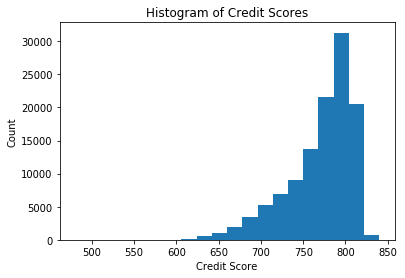

In [52]:
plt.hist(train['borrower_credit_score'],bins=20)
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.title("Histogram of Credit Scores")
# Looks like a negatively skewed distribution.

In [53]:
train['loan_purpose'].value_counts(dropna=False)
# Most people have taken the loan for the purpose of A23 followed by almost equal number for B12 and C86

A23    58459
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

In [54]:
train.groupby('loan_purpose')['m13'].value_counts(dropna=False)

loan_purpose  m13
A23           0      58248
              1        211
B12           0      29164
              1        219
C86           0      28007
              1        206
Name: m13, dtype: int64

In [55]:
train['insurance_percent'].describe()

count    116055.000000
mean          2.786360
std           8.096556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          40.000000
Name: insurance_percent, dtype: float64

In [56]:
train['insurance_percent'].value_counts(dropna=False)
# Insurance does not cover most of the loans.as per the list below.

0.0     102452
30.0      5113
25.0      4885
12.0      2493
6.0        701
35.0       372
16.0        18
18.0        12
20.0         3
17.0         2
15.0         1
39.0         1
22.0         1
40.0         1
Name: insurance_percent, dtype: int64

In [57]:
test['insurance_percent'].value_counts(dropna=False)

0     31756
30     1577
25     1446
12      756
6       205
35      111
16       11
18        2
17        2
Name: insurance_percent, dtype: int64

In [58]:
train['co-borrower_credit_score'].describe()

count    116055.000000
mean        459.616570
std         381.945805
min           0.000000
25%           0.000000
50%         740.000000
75%         791.000000
max         836.000000
Name: co-borrower_credit_score, dtype: float64

In [59]:
train[(train['number_of_borrowers'] == 2) & (train['co-borrower_credit_score'] == 0)]
# Even though there are more than 1 buyers, they have a 0 credit score which needs to be imputed.

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,value_of_asset,origination_month,first_payment_month,first_payment_quarter
2749,X,"Martinez, Duffy and Bird",5.000,130000,360,80,2.0,27.0,654.000000,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,162500.0,3,5,2
4890,X,OTHER,3.375,110000,180,53,2.0,25.0,791.000000,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,207547.0,2,4,2
10759,X,"Swanson, Newton and Miller",3.625,145000,120,47,2.0,31.0,804.000000,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,308511.0,3,4,2
16849,X,OTHER,3.200,96000,180,80,2.0,38.0,758.000000,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,120000.0,1,3,1
23375,X,OTHER,4.250,278000,360,65,2.0,9.0,750.000000,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,427692.0,3,5,2
23969,X,Browning-Hart,4.750,94000,360,80,2.0,15.0,770.221558,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,117500.0,2,4,2
24666,X,OTHER,4.625,69000,360,80,2.0,43.0,646.000000,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,86250.0,2,4,2
24883,Z,OTHER,4.750,155000,360,34,2.0,19.0,684.000000,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,455882.0,2,4,2
25627,X,OTHER,3.375,113000,180,74,2.0,25.0,733.000000,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,152703.0,2,4,2
27930,X,OTHER,4.625,266000,360,70,2.0,35.0,645.000000,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,380000.0,1,3,1


In [60]:
score = train[train['number_of_borrowers'] == 2]['co-borrower_credit_score'].mean()
train[(train['number_of_borrowers'] == 2)&(train['co-borrower_credit_score'] == 0)]['co-borrower_credit_score'].replace({0:score},inplace=True)
test[(test['number_of_borrowers'] == 2)&(test['co-borrower_credit_score'] == 0)]['co-borrower_credit_score'].replace({0:score},inplace=True)

C:\Users\m1013523\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [61]:
def g(x):
    if x['co-borrower_credit_score'] == 0:
        return x['borrower_credit_score']+x['co-borrower_credit_score']
    else:
        return round((x['borrower_credit_score']+x['co-borrower_credit_score'])/2,0)
train['borrower_credit_score'] = train.apply(g,axis=1)
test['borrower_credit_score'] = test.apply(g,axis=1)

In [62]:
train['insurance_type'].value_counts(dropna=False)
# Premium is paid by the borrower in most of the cases.

0.0    115677
1.0       378
Name: insurance_type, dtype: int64

In [63]:
for col in train.columns:
    if ((col.startswith("m")) & (col != "m13")):
        print ("Value Counts of variable:",col)
        print (train[col].value_counts(dropna=False))

Value Counts of variable: m1
0    115726
1       293
2        30
3         6
Name: m1, dtype: int64
Value Counts of variable: m2
0    115841
1       196
2        13
3         3
4         2
Name: m2, dtype: int64
Value Counts of variable: m3
0    115865
1       167
2        14
3         4
4         3
5         2
Name: m3, dtype: int64
Value Counts of variable: m4
0    115857
1       168
2        16
3         8
4         3
6         2
5         1
Name: m4, dtype: int64
Value Counts of variable: m5
0    115749
1       249
2        33
3        12
4         6
5         3
7         2
6         1
Name: m5, dtype: int64
Value Counts of variable: m6
0    115782
1       214
2        26
3        16
4         9
5         4
6         2
8         1
7         1
Name: m6, dtype: int64
Value Counts of variable: m7
0    115725
1       266
2        28
3        13
4         8
5         7
6         4
7         2
9         1
8         1
Name: m7, dtype: int64
Value Counts of variable: m8
0     115693
1     

In [64]:
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (116055, 30)
Testing shape:  (35866, 29)


In [65]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
corr_matrix.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,value_of_asset,origination_month,first_payment_month,first_payment_quarter
interest_rate,1.000000,0.002904,0.720733,0.273379,0.128057,0.181998,0.232764,0.143121,0.137996,0.055884,0.017420,0.026093,0.026728,0.030544,0.035727,0.034312,0.032134,0.035394,0.035842,0.037995,0.037052,0.039709,0.054299,0.112949,0.128586,0.136129,0.112552
unpaid_principal_bal,0.002904,1.000000,0.192310,0.062606,0.130727,0.073330,0.062331,0.010997,0.132791,0.016006,0.001353,0.003997,0.006024,0.010344,0.011461,0.007812,0.008910,0.009227,0.008982,0.005862,0.006408,0.008251,0.017118,0.756405,0.025058,0.024507,0.032158
loan_term,0.720733,0.192310,1.000000,0.292564,0.107319,0.137877,0.077522,0.190765,0.110246,0.028732,0.008976,0.011740,0.010129,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015774,0.023502,0.026836,0.020964,0.028528,0.016715
loan_to_value,0.273379,0.062606,0.292564,1.000000,0.100899,0.127010,0.157912,0.490127,0.109547,0.075813,0.002302,0.008937,0.007076,0.009825,0.006927,0.010560,0.010243,0.009937,0.008775,0.011102,0.010856,0.010811,0.016356,0.444736,0.004250,0.017049,0.012797
number_of_borrowers,0.128057,0.130727,0.107319,0.100899,1.000000,0.134413,0.139352,0.058982,0.996498,0.015770,0.019401,0.020743,0.018937,0.023443,0.024666,0.022337,0.023717,0.027473,0.028034,0.025947,0.027609,0.029662,0.039981,0.141579,0.021146,0.024735,0.018904


In [66]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,value_of_asset,origination_month,first_payment_month,first_payment_quarter
interest_rate,NaN,0.002904,0.720733,0.273379,0.128057,0.181998,0.232764,0.143121,0.137996,0.055884,0.017420,0.026093,0.026728,0.030544,0.035727,0.034312,0.032134,0.035394,0.035842,0.037995,0.037052,0.039709,0.054299,0.112949,0.128586,0.136129,0.112552
unpaid_principal_bal,NaN,NaN,0.192310,0.062606,0.130727,0.073330,0.062331,0.010997,0.132791,0.016006,0.001353,0.003997,0.006024,0.010344,0.011461,0.007812,0.008910,0.009227,0.008982,0.005862,0.006408,0.008251,0.017118,0.756405,0.025058,0.024507,0.032158
loan_term,NaN,NaN,NaN,0.292564,0.107319,0.137877,0.077522,0.190765,0.110246,0.028732,0.008976,0.011740,0.010129,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015774,0.023502,0.026836,0.020964,0.028528,0.016715
loan_to_value,NaN,NaN,NaN,NaN,0.100899,0.127010,0.157912,0.490127,0.109547,0.075813,0.002302,0.008937,0.007076,0.009825,0.006927,0.010560,0.010243,0.009937,0.008775,0.011102,0.010856,0.010811,0.016356,0.444736,0.004250,0.017049,0.012797
number_of_borrowers,NaN,NaN,NaN,NaN,NaN,0.134413,0.139352,0.058982,0.996498,0.015770,0.019401,0.020743,0.018937,0.023443,0.024666,0.022337,0.023717,0.027473,0.028034,0.025947,0.027609,0.029662,0.039981,0.141579,0.021146,0.024735,0.018904


In [67]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print('Columns to drop are:',to_drop)

There are 2 columns to remove.
Columns to drop are: ['co-borrower_credit_score', 'first_payment_month']


In [68]:
train = train.drop(columns = to_drop)
test = test.drop(columns = to_drop)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (116055, 28)
Testing shape:  (35866, 27)


In [69]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [70]:
X = train[[col for col in train.columns if col!='m13']]
y = train['m13']

In [71]:
#smt = SMOTETomek(ratio='auto')
#X_smt, y_smt = smt.fit_sample(X, y)

#ros = RandomOverSampler()
#X_ros, y_ros = ros.fit_sample(X, y)

In [73]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42,class_weight='balanced')
grid = {"n_estimators":list(range(100,1001,100)),
        "max_features":[0.5,'sqrt','log2'],
        "min_samples_leaf":[1,3,5,7,10,15,25,50],
        "min_samples_split":[2,5,10,15,25,50]}
random = RandomizedSearchCV(estimator=rf,param_distributions=grid,cv=5,scoring='f1')
random.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_job

In [74]:
random.best_estimator_,random.best_params_,random.best_score_

(RandomForestClassifier(bootstrap=True, class_weight='balanced',
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=3,
                        min_samples_split=10, min_weight_fraction_leaf=0.0,
                        n_estimators=400, n_jobs=-1, oob_score=False,
                        random_state=42, verbose=0, warm_start=False),
 {'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 10,
  'n_estimators': 400},
 0.538774058035931)

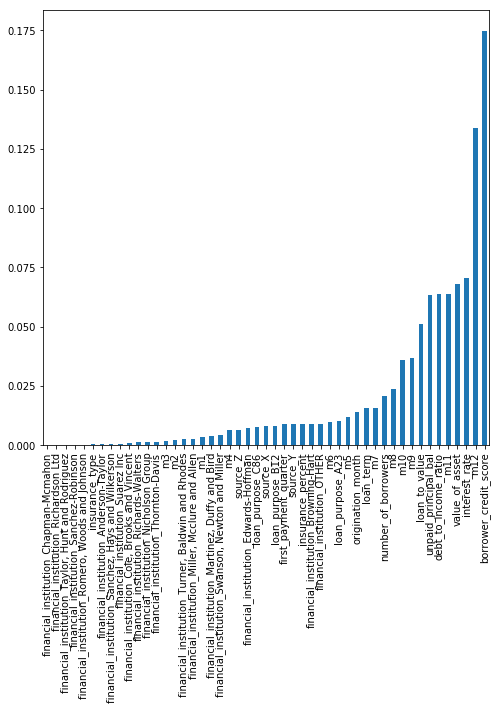

In [75]:
plt.figure(figsize=(8,8))
ser = pd.Series(random.best_estimator_.feature_importances_,X.columns).sort_values()
ser.plot(kind='bar')

In [76]:
Submission['m13'] = random.predict(test)
Submission.to_csv("Eleventh.csv",index=None)